In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import recall_score,accuracy_score
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.metrics import classification_report, recall_score,accuracy_score,f1_score, precision_score
import warnings
warnings.filterwarnings("ignore")

In [82]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


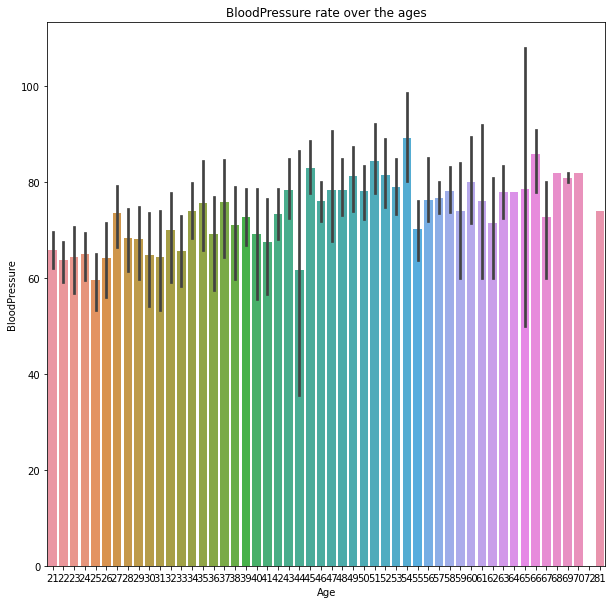

In [84]:
ag=data["Age"]
vd=data["BloodPressure"]
plt.figure(figsize=(10,10))
sns.barplot(y=vd,x=ag)
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('BloodPressure rate over the ages')
plt.show()

# Preprocessing

### Checking for null values and removing null values

In [85]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
data.duplicated().sum()

0

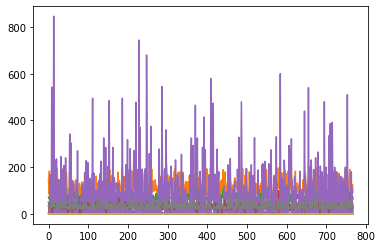

In [87]:
plt.plot(data)

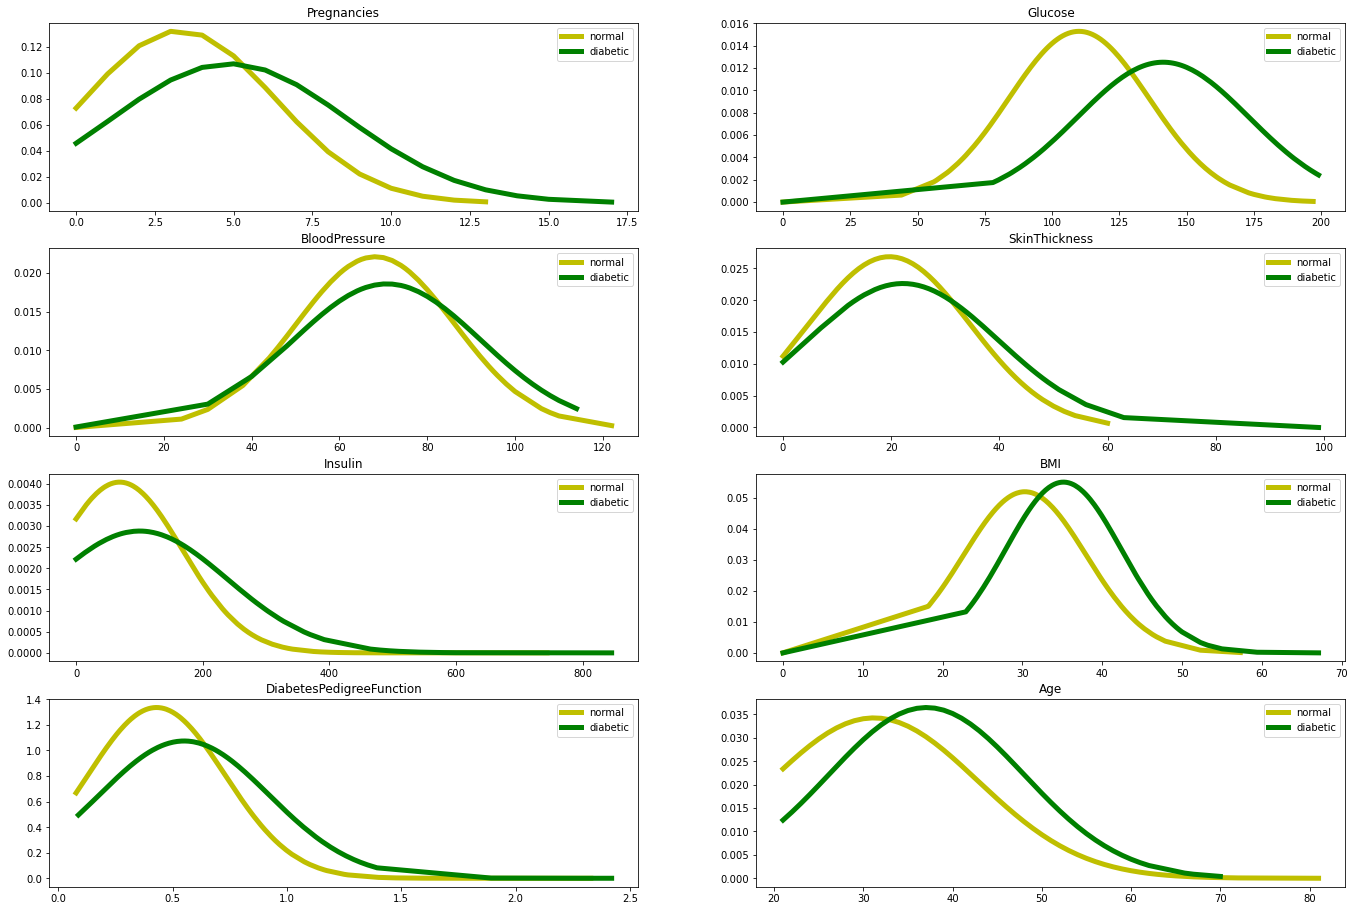

In [144]:
fig,axs=plt.subplots(4,2)

ft=list(data.columns)

index=-1
a={index:i for index,i in enumerate(data.columns.values)}
for row in range(4):
    for columns in range(2):
        index+=1

        data.sort_values(by=a[index], inplace=True)
        normal=data[data['Outcome']==0]
        diabetic=data[data['Outcome']==1]
        fit = stats.norm.pdf(normal[a[index]], np.mean(normal[a[index]]), np.std(normal[a[index]]))  #this is a fitting indeed
        axs[row,columns].plot(normal[a[index]],fit, color='y', linewidth=5, label="normal")
    
        axs[row,columns].set_title(a[index])
        
        fit = stats.norm.pdf(diabetic[a[index]], np.mean(diabetic[a[index]]), np.std(diabetic[a[index]]))
        axs[row,columns].plot(diabetic[a[index]],fit, color='g', linewidth=5,label="diabetic")
        axs[row,columns].legend(loc=1)
        
plt.subplots_adjust(left=1,right=4,bottom=1,top=4)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

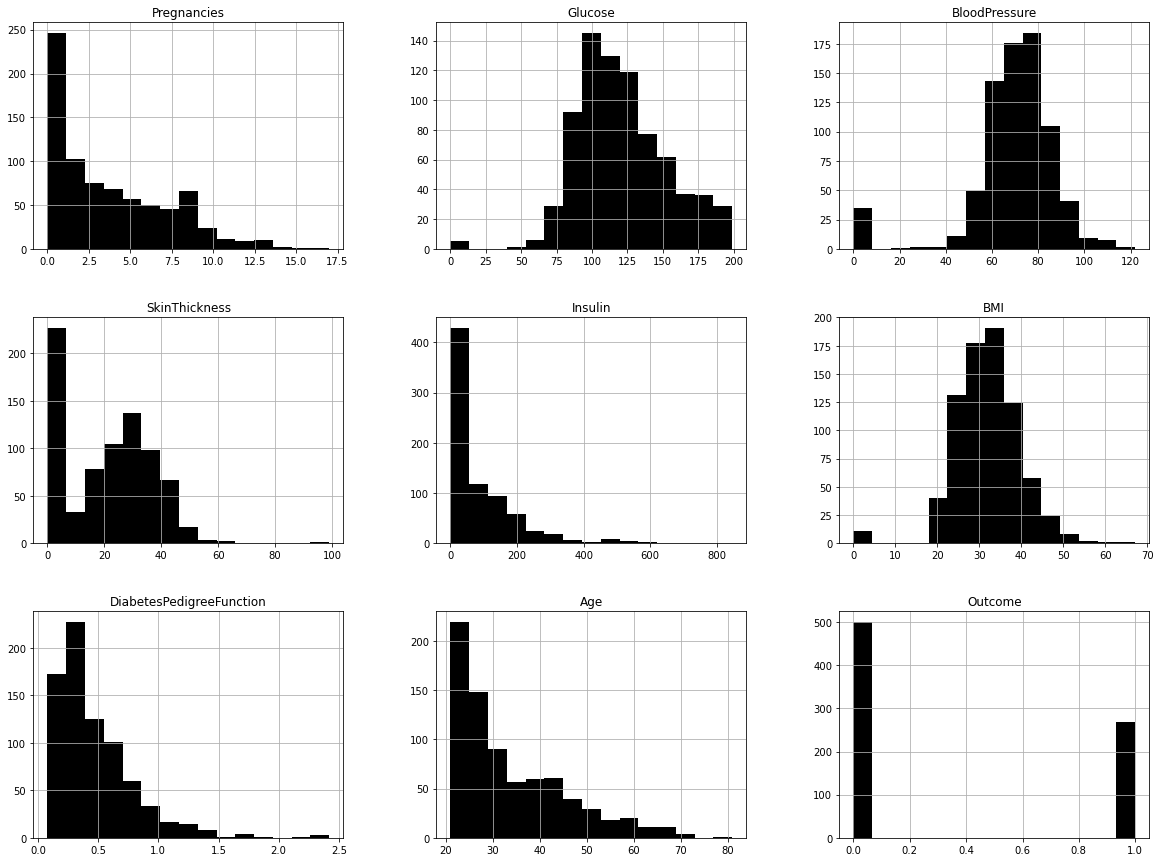

In [7]:
data.hist(figsize=(20,15), bins=15, color="Black")

<AxesSubplot:>

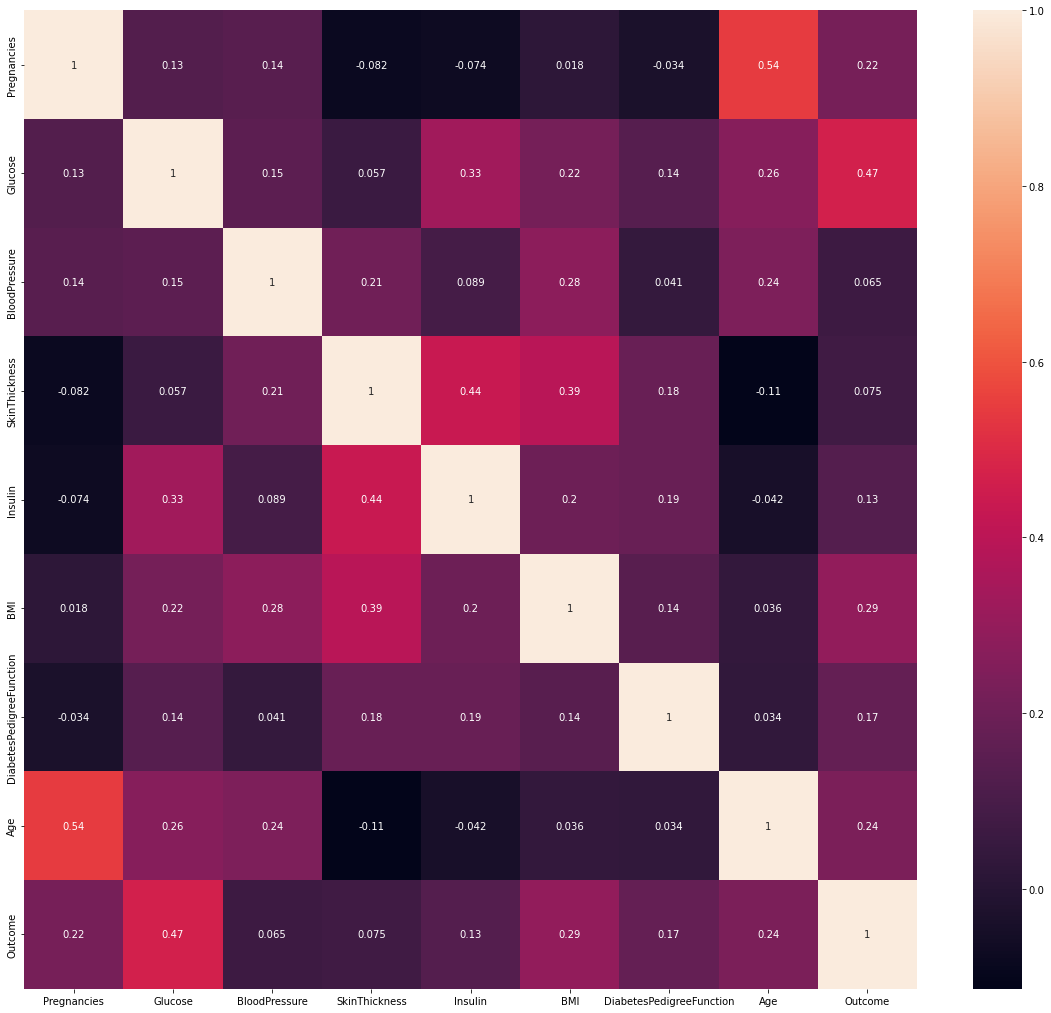

In [8]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True, cmap="rocket")

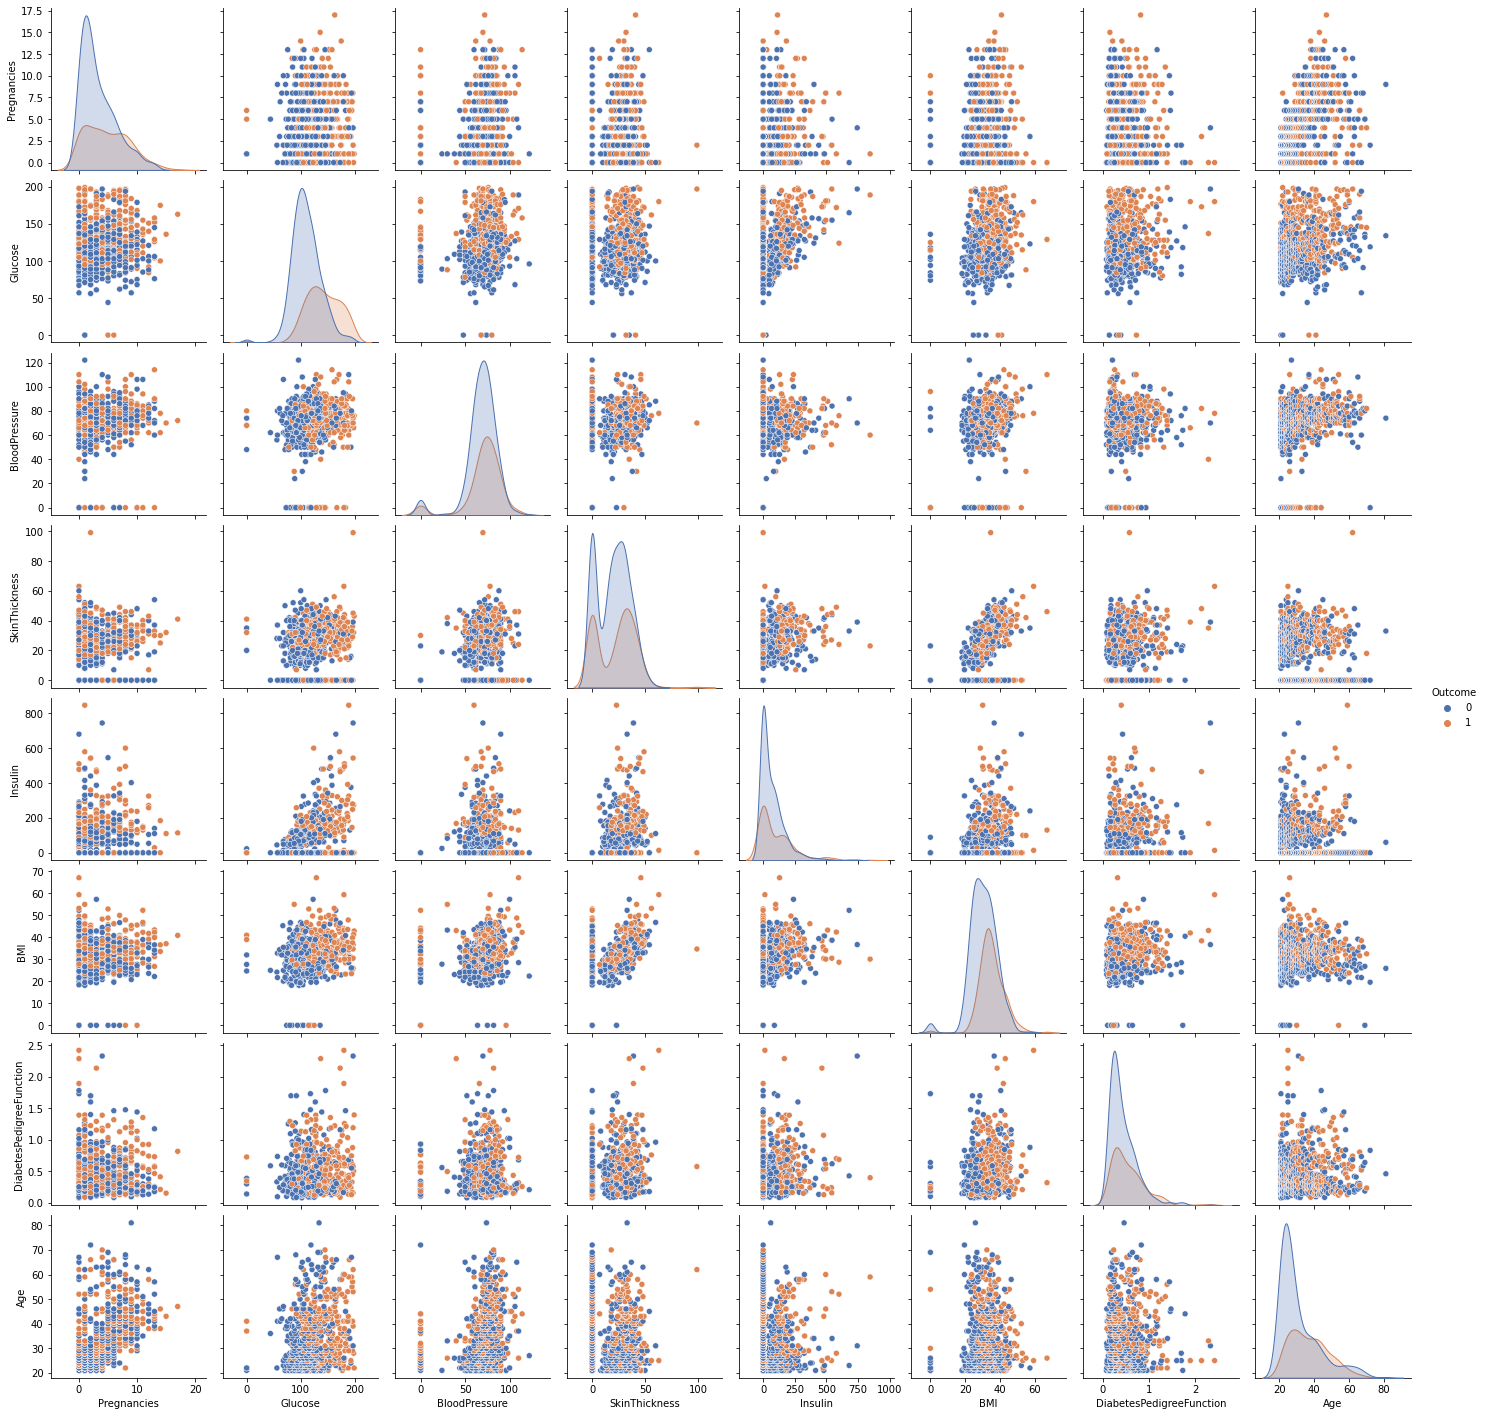

In [138]:
sctr = sns.pairplot(data,hue="Outcome",palette="deep")

<AxesSubplot:title={'center':'output count(target)'}>

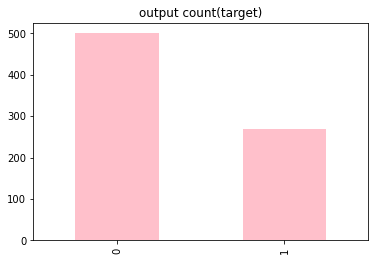

In [45]:
data['Outcome'].value_counts().plot(kind='bar',color='pink', title='output count(target)')

# Algorithms

### Spliting the dataset for training and testing

In [10]:
X = data.values[:,0:8]
y = data.values[:,8]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

#### Support Vector Machine

In [12]:
SVM = SVC( C= 10, kernel='linear', random_state=1)
SVM.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=1)

In [13]:
y_pred = SVM.predict(X_test)
svm_acc = accuracy_score(y_true=y_test, y_pred=SVM.predict(X_test))
print('Accuracy Score on train data:', svm_acc)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score on train data: 0.7291666666666666
Confusion matrix:
[[110  17]
 [ 35  30]]


In [14]:
print("classification report:")
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       127
         1.0       0.64      0.46      0.54        65

    accuracy                           0.73       192
   macro avg       0.70      0.66      0.67       192
weighted avg       0.72      0.73      0.72       192



In [15]:
#hyper parameter tuning
svc= SVC()
parameters = {
    "kernel": ["linear","rbf", "poly", "sigmoid"],
    "C":[0.1,1,10],
    "random_state": [1,47]
}
cv = GridSearchCV(svc,parameters,cv=5)
cv.fit(X_train, y_train)
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'C': 10, 'kernel': 'linear', 'random_state': 1}


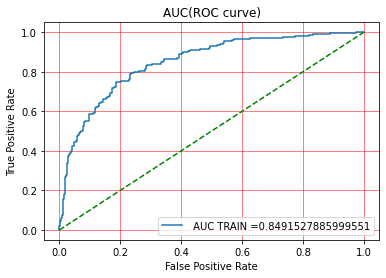

In [16]:
y_tr_pred = SVM.decision_function(X_train)    
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train, y_tr_pred)
plt.grid()
plt.plot(tr_fpr, tr_tpr, label=" AUC TRAIN ="+str(auc(tr_fpr, tr_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='red', linestyle='-', linewidth=0.5)
plt.show()


#### Decision Tree

In [17]:
DTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
DTree.fit(X_train, y_train)
y_pred =  DTree.predict(X_test)

In [18]:
dt_acc = accuracy_score(y_true=y_test, y_pred=DTree.predict(X_test))
print('Accuracy Score on test data:',dt_acc)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Accuracy Score on test data: 0.6875
Confusion matrix: [[98 29]
 [31 34]]
classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       127
         1.0       0.54      0.52      0.53        65

    accuracy                           0.69       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.69      0.69      0.69       192



In [19]:
## using hyperparameter
decision_tree= DecisionTreeClassifier()
parameters = {
    "criterion": ["entropy", "gini"],
    "random_state": [1, 47]
}
cv = GridSearchCV(decision_tree, parameters,cv=5)
cv.fit(X_train, y_train)
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'criterion': 'entropy', 'random_state': 1}


#### plotting decision tree

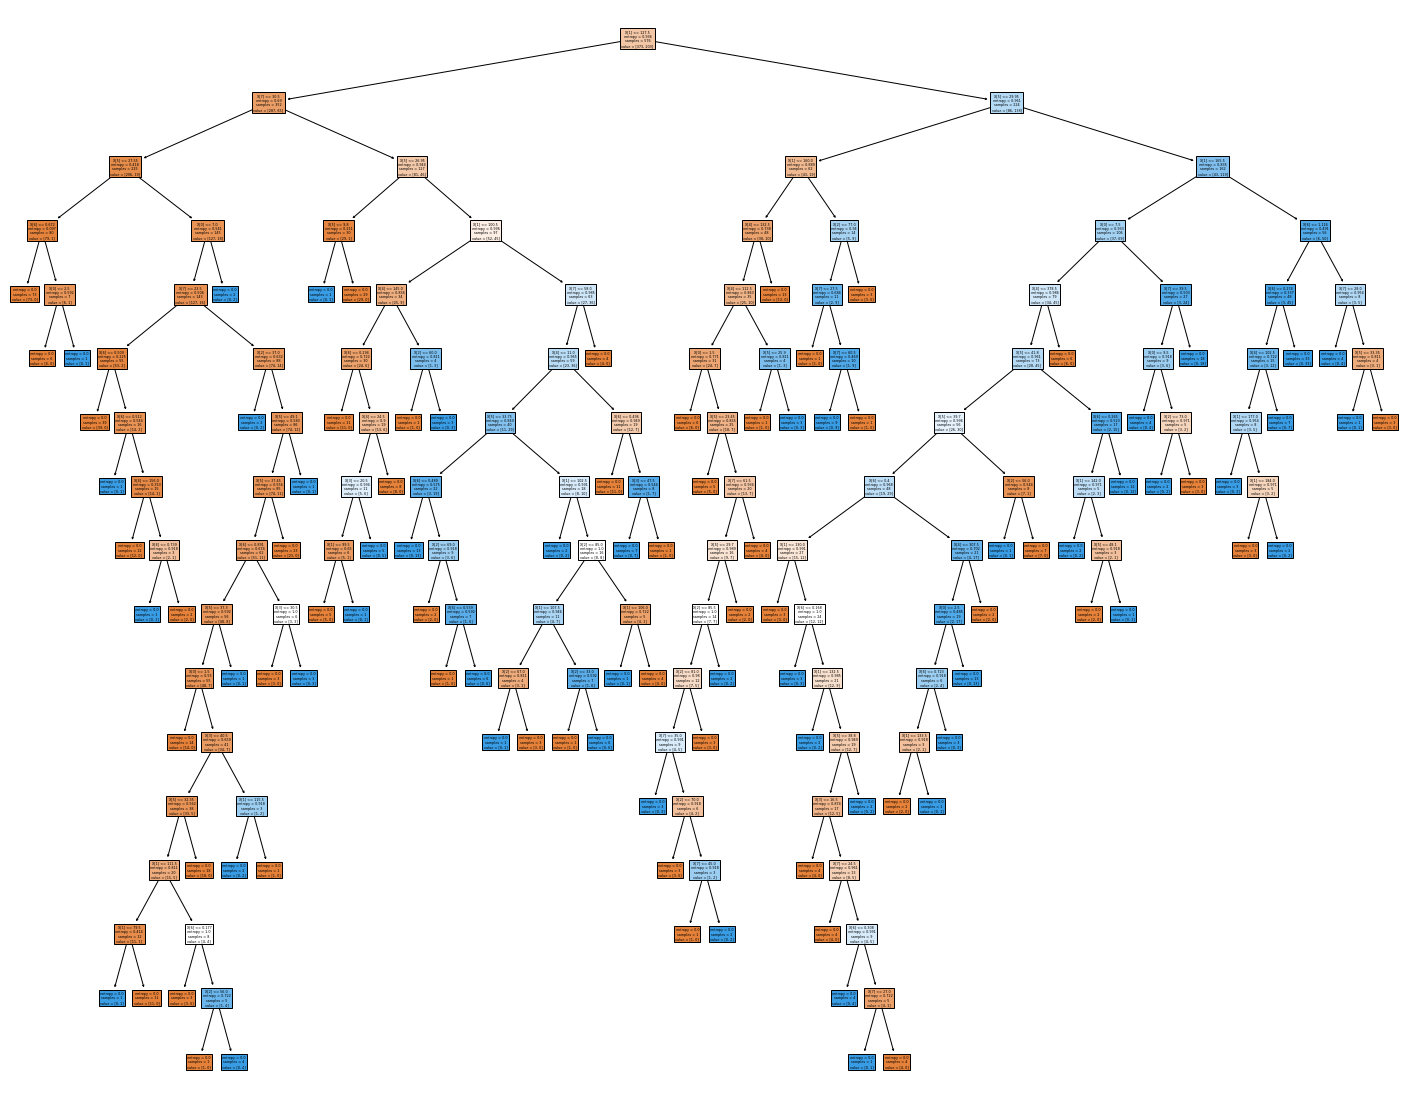

In [20]:
figure = plt.figure(figsize=(25,20))
plot = tree.plot_tree(DTree, 
                   filled=True)

#### MULTI-LAYERED PERCEPTRON

In [21]:
MLP = MLPClassifier(activation='tanh', alpha=0.0001, learning_rate="adaptive", solver='adam', max_iter=1000)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)

In [22]:
mlp_acc =  accuracy_score(y_true=y_test, y_pred=MLP.predict(X_test))

In [23]:
print('Accuracy Score:',mlp_acc)
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.6979166666666666
Confusion matrix: [[106  21]
 [ 37  28]]
classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.83      0.79       127
         1.0       0.57      0.43      0.49        65

    accuracy                           0.70       192
   macro avg       0.66      0.63      0.64       192
weighted avg       0.68      0.70      0.69       192



#### hyperparameter tunning of mlp classifier

In [24]:
mlp_gs = MLPClassifier(max_iter=300)
parameters = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameters, n_jobs=-1, cv=5)
clf.fit(X, y) # X is train samples and y is the corresponding labels
print(f'Best parameters are: {clf.best_params_}')

Best parameters are: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


#### NAIVE BAYES

In [25]:
NB = GaussianNB(var_smoothing=5.336699231206313e-06)
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

In [26]:
nb_acc = accuracy_score(y_true=y_test, y_pred=NB.predict(X_test))
print('Accuracy Score on test data:', nb_acc)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Accuracy Score on test data: 0.7447916666666666
Confusion matrix: [[108  19]
 [ 30  35]]
classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82       127
         1.0       0.65      0.54      0.59        65

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.74      0.74      0.74       192



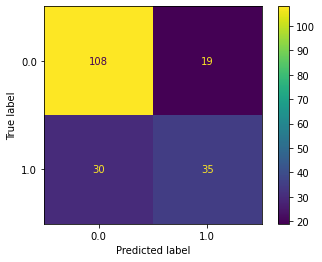

In [27]:
plot_confusion_matrix(NB, X_test, y_test)
plt.show()

### Hyper-parameter tunning for naive Bayes

In [28]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
GaussianNB(var_smoothing=0.002543345761304648)


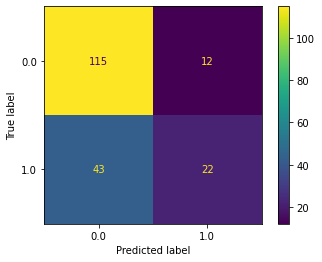

Accuracy: 0.7135416666666666
              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81       127
         1.0       0.65      0.34      0.44        65

    accuracy                           0.71       192
   macro avg       0.69      0.62      0.63       192
weighted avg       0.70      0.71      0.68       192



In [139]:
score=[]
for i in range(1,50):
    knnalgo=KNeighborsClassifier(n_neighbors=i)
    knnalgo.fit(X_train,y_train)
    y_pred=knnalgo.predict(X_test)
    temp=mean_squared_error(y_test,y_pred)
    score.append(temp)
    
knnalgo=KNeighborsClassifier(n_neighbors=26)
knnalgo.fit(X_train, y_train)
y_pred = knnalgo.predict(X_test)
knn_acc = accuracy_score(y_true=y_test, y_pred=knnalgo.predict(X_test))
temp=mean_squared_error(y_test, y_pred)
plot_confusion_matrix(knnalgo, X_test, y_test)
plt.show()
print("Accuracy:",knn_acc)
print(classification_report(y_test, y_pred))

In [79]:
from sklearn.linear_model import LogisticRegression

LRmod=LogisticRegression()
LRmod.fit(X_train, y_train)
y_pred=LRmod.predict(X_test)
LR_acc=accuracy_score(y_true=y_test,y_pred=LRmod.predict(X_test))
print("Logistic Regression accuracy",LR_acc)
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print("classification report:")
print(classification_report(y_test, y_pred))

Logistic Regression accuracy 0.7447916666666666
Confusion matrix: [[113  14]
 [ 35  30]]
classification report:
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       127
         1.0       0.68      0.46      0.55        65

    accuracy                           0.74       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.74      0.74      0.73       192



#### Comparing the results of all the algorithms

In [69]:
algorithms = ["SVM", "DECISION TREE", "MLP", "NAIVE BAYES","KNN","LOG REG"]
accuracies = [svm_acc, dt_acc, mlp_acc, nb_acc,knn_acc,LR_acc]
print(accuracies)

[0.7291666666666666, 0.6875, 0.6979166666666666, 0.7447916666666666, 0.7135416666666666, 0.7447916666666666]


Text(0, 0.5, 'Sequential')

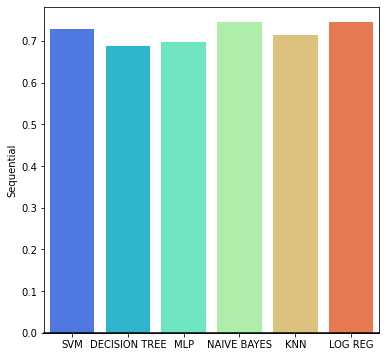

In [70]:
f, ax = plt.subplots(figsize=(6, 6))
x = algorithms
y1 = accuracies
sns.barplot(x=x, y=y1, palette="rainbow", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Sequential")

In [148]:
data1 = {"Classification Algorithms": ["SVM Classifier", "Decision Tree Classifier", "MLP Classifier", "Naive Bayes Classifier","KNN Classifier","Logistic Regression"],
      "Accuracy Score": [SVM.score(X_test,y_test), DTree.score(X_test,y_test), mlp_acc,
                NB.score(X_test,y_test),knn_acc,LR_acc],
       "Recall":[(recall_score(y_true=y_test, y_pred=SVM.predict(X_test))),(recall_score(y_true=y_test, y_pred=DTree.predict(X_test))),(recall_score(y_true=y_test, y_pred=MLP.predict(X_test))),(recall_score(y_true=y_test, y_pred=NB.predict(X_test))),(recall_score(y_true=y_test, y_pred=knnalgo.predict(X_test))),(recall_score(y_true=y_test, y_pred=LRmod.predict(X_test)))],
        "Precision":[(precision_score(y_true=y_test, y_pred=SVM.predict(X_test))),(precision_score(y_true=y_test, y_pred=DTree.predict(X_test))),(precision_score(y_true=y_test, y_pred=MLP.predict(X_test))),(precision_score(y_true=y_test, y_pred=NB.predict(X_test))),(precision_score(y_true=y_test, y_pred=knnalgo.predict(X_test))),(precision_score(y_true=y_test, y_pred=LRmod.predict(X_test)))],
        "F1-score":[(f1_score(y_true=y_test, y_pred=SVM.predict(X_test))),(f1_score(y_true=y_test, y_pred=DTree.predict(X_test))),(f1_score(y_true=y_test, y_pred=MLP.predict(X_test))),(f1_score(y_true=y_test, y_pred=NB.predict(X_test))),(f1_score(y_true=y_test, y_pred=knnalgo.predict(X_test))), (f1_score(y_true=y_test, y_pred=LRmod.predict(X_test)))]}
Tablesc = pd.DataFrame(data1)
Tablesc

,Classification Algorithms,Accuracy Score,Recall,Precision,F1-score
0,SVM Classifier,0.729167,0.461538,0.638298,0.535714
1,Decision Tree Classifier,0.687500,0.523077,0.539683,0.531250
2,MLP Classifier,0.697917,0.430769,0.571429,0.491228
3,Naive Bayes Classifier,0.744792,0.538462,0.648148,0.588235
4,KNN Classifier,0.713542,0.338462,0.647059,0.444444
5,Logistic Regression,0.744792,0.461538,0.681818,0.550459


## Cross validation Score

In [74]:
models = []
models.append(('Decision Tree', DTree))
models.append(('SVM', SVM))
models.append(('Naive Bayes', NB))
models.append(('MLP',MLP))
models.append(('KNN',knnalgo))
models.append(('Logistic Regression',LRmod))

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle = True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

Decision Tree: 0.709604 (0.035226)
SVM: 0.770728 (0.054466)
Naive Bayes: 0.759091 (0.052545)
MLP: 0.704340 (0.046346)
KNN: 0.735680 (0.050423)
Logistic Regression: 0.775940 (0.051058)


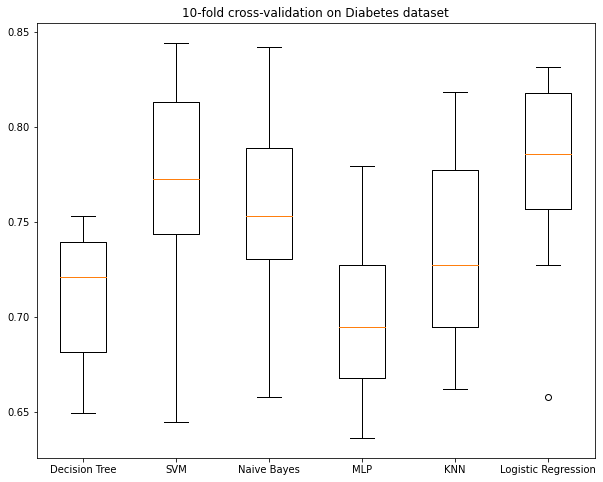

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

plt.figure(figsize=(10,8))
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Diabetes dataset')
pyplot.show()

In [77]:
mod=[KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC(),MLPClassifier(),LogisticRegression()]

## ROC

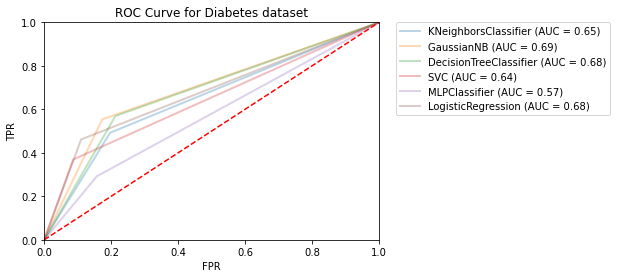

In [78]:
#ROC comparison
reg = 1
for p in mod:
    
    
    prediction = p.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, prediction)
    roc_auc_model = auc(fp, tp)
    model_name = p.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='%s (AUC = %0.2f)'  % (model_name, roc_auc_model))
   
    reg+=1

plt.title('ROC Curve for Diabetes dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')    
plt.show()

https://seaborn.pydata.org/examples/part_whole_bars.html

https://mljar.com/blog/visualize-decision-tree/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

https://www.kaggle.com/code/fathykhader/diabetes-classification-0-81